In [1]:
import utils
import route_distance
import methods
import pickle
import os
import osmnx as ox

/Users/kushagrakhatwani/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Loading saved graph


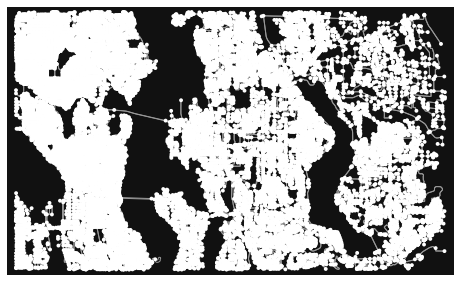

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
coord1 = (47.706695,-122.383568)
coord2 = (47.54514726776328,-121.98436109359878)

graph = utils.get_graph(coord1,coord2)

ox.plot_graph(graph)

In [5]:
#Load pre-processed data if already present
with open('./saved_dicts/adjoint_list','rb') as file:
    adj = pickle.load(file)

s = (47.6675475327084, -122.10569994137518)
t = (47.64143615307482, -122.14142098193388)

In [6]:
s1,t1,trim_data = utils.trim_dic(adj,15,s,t,'22:29:15','22:30:56',mode = 1)

In [7]:
trim_data = utils.add_noise(trim_data)

In [8]:
len(trim_data.keys())

8

In [9]:
adjacency_list = utils.form_adj_list(trim_data,s1,t1)

In [10]:
# len(adjacency_list)
adjacency_list['start']

{'index': -1,
 'coords_t+1': [(47.641566760245915, -122.19971654135715),
  (47.64165320962583, -122.19966269191767),
  (47.64187953737826, -122.19958856735067),
  (47.64196937055729, -122.1995568160473),
  (47.6429585, -122.201667),
  (47.641989, -122.2013783),
  (47.641293, -122.2011534),
  (47.6414374, -122.2011753),
  (47.642154888126804, -122.19943438476953),
  (47.64174742406449, -122.19963963114789),
  (47.64137222150612, -122.20189434261964),
  (47.6420892, -122.2020123),
  (47.6420064, -122.2009926),
  (47.642344, -122.2009814),
  (47.6410676, -122.2010367),
  (47.6411829, -122.2011324),
  (47.6402327, -122.2003503),
  (47.6401591, -122.20004)]}

In [11]:
route_distances = utils.get_route_dis(graph,adjacency_list)

with open("route_distances_custom","wb") as file:
    pickle.dump(route_distances,file) 

In [12]:
route_distances = {}
with open("route_distances_custom","rb") as file:
    route_distances = pickle.load(file)

In [13]:
hmm = methods.HMM(adjacency_list,route_distances)

In [14]:
j,pred = hmm.viterbi_search(s1,t1)

SIGMA: 3.74
BETA: 0.10841
0


In [15]:
df,path,vis = hmm.get_route(pred,s1,t1)

             Latitude            Longitude      Time
0   47.62967771603851  -122.17020114461322  22:30:56
1   47.63033494178559  -122.17427846981826  22:30:45
2   47.63170548892497   -122.1795625170192  22:30:30
3   47.63187578932309   -122.1850999681183  22:30:15
4  47.633021907887674  -122.18969122157634  22:30:00
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to map.html!


In [16]:
route_coords = []
t_tmp = 'end'
while t_tmp != None:
    prev_coord = pred[t_tmp]
    print(j[t_tmp],t_tmp)
    route_coords.append(t[1])
    route_coords.append(t[0])
    t_tmp = prev_coord

-5014.950458186195 end
-5014.950458186195 (47.62967771603851, -122.17020114461322)
-3516.6848113597225 (47.63033494178559, -122.17427846981826)
-3123.4469655741364 (47.63170548892497, -122.1795625170192)
-2875.781275655084 (47.63187578932309, -122.1850999681183)
-1584.1201786605127 (47.633021907887674, -122.18969122157634)
-1429.9256687195011 (47.63621841024491, -122.19232716521093)
-711.2994435167927 (47.639249271206225, -122.19586146070039)
-424.3778494932194 (47.641566760245915, -122.19971654135715)
1 start


In [18]:
# adj[(47.66748333, -122.1070833)]

df.to_csv('paper_algo.csv')

In [18]:
#Visualize route on KeplerGL
from keplergl import KeplerGl
map = KeplerGl(height=600, width=600)

map.add_data(data=df, name='map')
map.save_to_html(file_name='map.html')
# map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to map.html!


In [30]:
nm = methods.new_method(adjacency_list,route_distances)

In [31]:
jp1,min_coords,pred1 = nm.viterbi_search(s1,t1)

SIGMA: 3.74
BETA: 0.10841
GAMMA: 0.0158
1 ('start', (47.641566760245915, -122.19971654135715))
1 ('start', (47.64165320962583, -122.19966269191767))
1 ('start', (47.64187953737826, -122.19958856735067))
1 ('start', (47.64196937055729, -122.1995568160473))
1 ('start', (47.6429585, -122.201667))
1 ('start', (47.641989, -122.2013783))
1 ('start', (47.641293, -122.2011534))
1 ('start', (47.6414374, -122.2011753))
1 ('start', (47.642154888126804, -122.19943438476953))
1 ('start', (47.64174742406449, -122.19963963114789))
1 ('start', (47.64137222150612, -122.20189434261964))
1 ('start', (47.6420892, -122.2020123))
1 ('start', (47.6420064, -122.2009926))
1 ('start', (47.642344, -122.2009814))
1 ('start', (47.6410676, -122.2010367))
1 ('start', (47.6411829, -122.2011324))
1 ('start', (47.6402327, -122.2003503))
1 ('start', (47.6401591, -122.20004))
0


In [32]:
route_coords = []
t_tmp2 = min_coords
while t_tmp2 != None:
    prev_coord = pred1[t_tmp2]
    print(jp1[t_tmp2], t_tmp2)
    route_coords.append(t_tmp2[1])
    route_coords.append(t_tmp2[0])
    t_tmp2 = prev_coord

-25362.86266085132 ((47.62836356170347, -122.17060703373102), 'end')
-23394.736642335574 ((47.6318895, -122.1807098), (47.62948107083409, -122.17439437022597))
-20082.234008974014 ((47.634203780536076, -122.18872161403323), (47.63328197818397, -122.18414013808844))
-7707.399872128328 ((47.6407136, -122.1941847), (47.6371984, -122.1911138))
1 ('start', (47.642154888126804, -122.19943438476953))


In [33]:
# pred1

{('start', (47.641566760245915, -122.19971654135715)): None,
 ('start', (47.64165320962583, -122.19966269191767)): None,
 ('start', (47.64187953737826, -122.19958856735067)): None,
 ('start', (47.64196937055729, -122.1995568160473)): None,
 ('start', (47.6429585, -122.201667)): None,
 ('start', (47.641989, -122.2013783)): None,
 ('start', (47.641293, -122.2011534)): None,
 ('start', (47.6414374, -122.2011753)): None,
 ('start', (47.642154888126804, -122.19943438476953)): None,
 ('start', (47.64174742406449, -122.19963963114789)): None,
 ('start', (47.64137222150612, -122.20189434261964)): None,
 ('start', (47.6420892, -122.2020123)): None,
 ('start', (47.6420064, -122.2009926)): None,
 ('start', (47.642344, -122.2009814)): None,
 ('start', (47.6410676, -122.2010367)): None,
 ('start', (47.6411829, -122.2011324)): None,
 ('start', (47.6402327, -122.2003503)): None,
 ('start', (47.6401591, -122.20004)): None,
 ((47.639249271206225, -122.19586146070039),
  (47.6352667, -122.1916487)): ('s

In [37]:
df,path1,vis1 = nm.get_route(pred1,s1,min_coords)
# df,path1,vis1 = nm.get_route(pred1,s1,((47.63115163637047, -122.1777619140636)\
#                                        , (47.629537, -122.175084)))

             Latitude            Longitude      Time
0   47.62836356170347  -122.17060703373102  22:30:56
1   47.62948107083409  -122.17439437022597  22:30:45
2          47.6318895         -122.1807098  22:30:30
3   47.63328197818397  -122.18414013808844  22:30:15
4  47.634203780536076  -122.18872161403323  22:30:00
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to map.html!


In [38]:
df.to_csv('our_algo.csv')

In [39]:
df

,Latitude,Longitude,Time
0,47.62836356170347,-122.17060703373102,22:30:56
1,47.62948107083409,-122.17439437022597,22:30:45
2,47.6318895,-122.1807098,22:30:30
3,47.63328197818397,-122.18414013808844,22:30:15
4,47.634203780536076,-122.18872161403323,22:30:00
5,47.6371984,-122.1911138,22:29:45
6,47.6407136,-122.1941847,22:29:30
7,47.642154888126804,-122.19943438476953,22:29:15


In [40]:
import numpy as np
import pandas as pd

np_df_x,np_df_y,np_df_t = [],[],[]
for coord in path:
    np_df_x.append(coord[0])
    np_df_y.append(coord[1])

np_df = np.array([np_df_x,np_df_y]).T
df = pd.DataFrame(np_df, columns = ['Latitude','Longitude'])
df.to_csv('map_0.csv')

In [44]:
np_df_x,np_df_y = [],[]

time_for_coords = []
for keys in trim_data:
    np_df_x.append(keys[0])
    np_df_y.append(keys[1])
np_df = np.array([np_df_x,np_df_y]).T
df = pd.DataFrame(np_df, columns = ['Latitude','Longitude'])
df.to_csv('trim_data.csv')  